## Mini Project 03- NLP Emotions: Neural Network

Dataset:
- A. Tripathi, "Emotion Classification NLP", Kaggle.com, 2021. [Online]. Available: https://www.kaggle.com/datasets/anjaneyatripathi/emotion-classification-nlp. [Accessed: 16- Jul- 2022].

Sources:
- WASSA-2017 Shared Task on Emotion Intensity. Saif M. Mohammad and Felipe Bravo-Marquez. In Proceedings of the EMNLP 2017 Workshop on Computational Approaches to Subjectivity, Sentiment, and Social Media (WASSA), September 2017, Copenhagen, Denmark.
BibTex

Emotion Labels:
- joy: 1
- sadness: 2
- anger: 3
- fear: 4

### Import Libraries

In [145]:
# Check keras and tensorflow versions
import keras
import tensorflow as tf

print("Keras version: ", keras.__version__)
print("Tensorflow version: ", tf.__version__)

Keras version:  2.9.0
Tensorflow version:  2.9.1


In [146]:
## Import Libraries
import numpy as np
import pandas as pd
import math
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# from sklearn.datasets import fetch_olivetti_faces
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

# import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.utils import to_categorical

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import gc

from keras.preprocessing.text import Tokenizer
from keras.layers import Convolution1D, Conv1D, Flatten, Dropout, Dense, MaxPooling1D
from keras.callbacks import TensorBoard

### Load Data

In [147]:
dfData= pd.read_csv("convertedTextDataset.csv")

In [148]:
dfData.drop(['Unnamed: 0'], axis= 1, inplace= True)

In [149]:
dfData['label'].replace({1: 0, 2: 1, 3: 2, 4: 3}, inplace= True)

In [150]:
dfData.head()

,text,label,short
0,Just got back from seeing @GaryDelaney in Burs...,0,get see burslem amaze face hurt laugh hilarious
1,Oh dear an evening of absolute hilarity I don'...,0,dear even absolute hilarity don think laugh lo...
2,Been waiting all week for this game ❤️❤️❤️ #ch...,0,wait week game red heart red heart red heart c...
3,"@gardiner_love : Thank you so much, Gloria! Yo...",0,thank gloria sweet thoughtful day joyful love ...
4,I feel so blessed to work with the family that...,0,feel bless work family nanny red heart love am...


### Split the data into train and test sets

In [151]:
## split the dataset
# Features and Labels
X= dfData['short']
target= dfData['label']
# XnlpFeatures= dfNlpFeatures.iloc[:, 2:]
# ynlpFeatures= dfNlpFeatures[dfNlpFeatures.columns[1]]
y= to_categorical(target)

In [152]:
# split the dataset
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state= 42)
# X_train, X_test, y_train, y_test= train_test_split(XnlpFeatures, ynlpFeatures, test_size= 0.2,
#                                                    random_state= 42)

## Feature Engineering

### Count Vectors as features

In [153]:
# create a count vectorizer object
count_vect= CountVectorizer(token_pattern = r'\w{1,}')
print(count_vect)
# Transform documents to document-term matrix.
X_train_count= count_vect.fit_transform(X_train.astype('str'))
X_test_count= count_vect.transform(X_test.astype('str'))

CountVectorizer(token_pattern='\\w{1,}')


### TF-IDF Vectors as features
- Word level

In [154]:
%%time
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer = 'word',
                             token_pattern = r'\w{1,}',
                             max_features = 5000)
print(tfidf_vect)
# tfidf_vect.fit(dfData['text'])
X_train_tfidf = tfidf_vect.fit_transform(X_train.astype('str'))
X_test_tfidf  = tfidf_vect.transform(X_test.astype('str'))

TfidfVectorizer(max_features=5000, token_pattern='\\w{1,}')
CPU times: total: 62.5 ms
Wall time: 72.8 ms


In [155]:
X_trainArr= X_train_count.toarray()
X_testArr= X_test_count.toarray()
X_trainArr2= X_train_tfidf.toarray()
X_testArr2= X_test_tfidf.toarray()

In [156]:
X_trainArr.shape

(5681, 8917)

In [157]:
n_words = X_trainArr.shape[1]
n_words

8917

### Create the model's architecture

In [158]:
# Set up the model architecture
model = Sequential()

### Compile the model

In [159]:
# Add the first hidden layer
model.add(Dense(100, activation = 'relu', input_shape = (n_words, )))
# Add the second hidden layer
model.add(Dense(25, activation = 'relu'))
# # Add the third hidden layer
model.add(Dense(15, activation = 'relu'))
# # # Add the fourth hidden layer
# model.add(Dense(8, activation = 'relu'))
# Add the output layer
model.add(Dense(4, activation = 'softmax'))

In [160]:
print(model.summary())

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_96 (Dense)            (None, 100)               891800    
                                                                 
 dense_97 (Dense)            (None, 25)                2525      
                                                                 
 dense_98 (Dense)            (None, 15)                390       
                                                                 
 dense_99 (Dense)            (None, 4)                 64        
                                                                 
Total params: 894,779
Trainable params: 894,779
Non-trainable params: 0
_________________________________________________________________
None


In [161]:
# Compile the model
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'])

### Fit the training data

In [162]:
X_trainArr.shape

(5681, 8917)

In [163]:
y_train.shape

(5681, 4)

In [164]:
%%time
# Fit the model
history = model.fit(
    X_trainArr,
    y_train,
    validation_split= 0.25,
    batch_size= 20,
    epochs= 15,
    verbose= 1)

Epoch 1/15
213/213 [==============================] - 2s 6ms/step - loss: 1.0834 - accuracy: 0.5538 - val_loss: 0.6461 - val_accuracy: 0.7797
Epoch 2/15
213/213 [==============================] - 1s 5ms/step - loss: 0.3194 - accuracy: 0.9000 - val_loss: 0.5249 - val_accuracy: 0.8318
Epoch 3/15
213/213 [==============================] - 1s 5ms/step - loss: 0.1199 - accuracy: 0.9655 - val_loss: 0.5298 - val_accuracy: 0.8318
Epoch 4/15
213/213 [==============================] - 1s 5ms/step - loss: 0.0754 - accuracy: 0.9746 - val_loss: 0.5627 - val_accuracy: 0.8241
Epoch 5/15
213/213 [==============================] - 1s 5ms/step - loss: 0.0596 - accuracy: 0.9746 - val_loss: 0.5701 - val_accuracy: 0.8374
Epoch 6/15
213/213 [==============================] - 1s 5ms/step - loss: 0.0516 - accuracy: 0.9744 - val_loss: 0.5825 - val_accuracy: 0.8360
Epoch 7/15
213/213 [==============================] - 1s 5ms/step - loss: 0.0444 - accuracy: 0.9763 - val_loss: 0.6145 - val_accuracy: 0.8381
Epoch 

In [165]:
# predictions = model.predict_classes(X_test)
predict_x= model.predict(X_testArr) 
# classes_x= np.argmax(predict_x, axis=1)
classes_x= predict_x.argmax(axis= 1)

45/45 [==============================] - 0s 3ms/step


In [166]:
classes_x.shape

(1421,)

In [167]:
X_testArr.shape

(1421, 8917)

In [168]:
y_test.shape

(1421, 4)

In [169]:
import time

In [170]:
%%time
tic01= time.time()
score = model.evaluate(X_testArr, y_test, batch_size = 10)
print('\nTest loss: %.6f, Test accuracy: %.6f' % tuple(score))
toc01= time.time()
runTimeNeural= (toc01-tic01)*1000

143/143 [==============================] - 0s 2ms/step - loss: 0.7553 - accuracy: 0.8220

Test loss: 0.755330, Test accuracy: 0.821956
CPU times: total: 578 ms
Wall time: 325 ms


In [171]:
runTimeNeural

324.51391220092773

In [172]:
def print_cm(cm):
    c = '%%%dd ' % len('%d' % cm.max())
    s = ' | '
    s += ''.join([c % i for i in range(len(cm[0]))])
    print(s)
    print('-' * len(s))
    for i, r in enumerate(cm):
        s = '%d| ' % i
        s += c * len(r)
        print(s % tuple(r))

In [173]:
y_test_target = np.array([x.argmax() for x in y_test])
cm = confusion_matrix(y_test_target, classes_x)
print_cm(cm)

 |   0   1   2   3 
-------------------
0| 293   6   6  18 
1|  24 216  29  47 
2|  16  28 271  12 
3|  22  33  12 388 


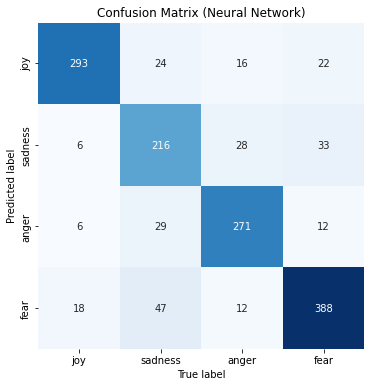

In [174]:
confuseLabels= ('joy', 'sadness', 'anger', 'fear')
# plot
fig, ax = plt.subplots(1, 1, figsize = (8, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)
# Confusion Matrix
sns.heatmap(cm.T, square= True, annot= True, fmt= 'd', cbar= False, cmap= 'Blues', ax= ax,
           xticklabels= confuseLabels, yticklabels= confuseLabels)

ax.set_title(f'Confusion Matrix (Neural Network)')
ax.set_xlabel('True label')
ax.set_ylabel('Predicted label')
    
plt.savefig('image33.png', facecolor='w', bbox_inches="tight",
        pad_inches=0.3, transparent=True)

plt.show()

In [175]:
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

In [176]:
%%time
def baseline_model02():
    # create model
    model = Sequential()
    model.add(Dense(100, activation= 'relu', input_shape= (n_words,)))
    model.add(Dense(25, activation= 'relu'))
    model.add(Dense(15, activation= 'relu'))
    model.add(Dense(4, activation= 'softmax'))
    # Compile model
    model.compile(
        optimizer= 'adam',
        loss= 'categorical_crossentropy',
        metrics= ['accuracy'])
    return model

# evaluate model
estimator= KerasRegressor(model= baseline_model02, epochs= 15, batch_size= 20, verbose= 0)
kfold= KFold(n_splits= 5)
results= cross_val_score(estimator, X_trainArr, y_train, cv= kfold)
print("Baseline: %.2f (%.2f) Accuracy" % (results.mean(), results.std()))

Baseline: 0.62 (0.01) Accuracy
CPU times: total: 6min 21s
Wall time: 1min 27s


In [177]:
meanAcc= results.mean()
meanAcc

0.6198835989295695

In [178]:
neuralClassReport= classification_report(y_test_target, classes_x)
print(neuralClassReport)

              precision    recall  f1-score   support

           0       0.90      0.85      0.87       323
           1       0.74      0.71      0.73       316
           2       0.87      0.81      0.84       327
           3       0.78      0.87      0.82       455

    accuracy                           0.82      1421
   macro avg       0.82      0.81      0.81      1421
weighted avg       0.82      0.82      0.82      1421



In [179]:
neuralClassReportDict= classification_report(y_test_target, classes_x, output_dict= True)
neuralClassReportDict['1']['precision']

0.7632508833922261

In [180]:
arr01= []
for i in neuralClassReportDict['macro avg']:
    neuralClassMetric= neuralClassReportDict['macro avg'][i]
    arr01.append(neuralClassMetric)

arr01.append('neuralNetwork')
arr01.append(runTimeNeural)
arr01.append(meanAcc)
arr01

[0.8188032140201138,
 0.8180396192372018,
 0.8173242815971525,
 1421,
 'neuralNetwork',
 324.51391220092773,
 0.6198835989295695]

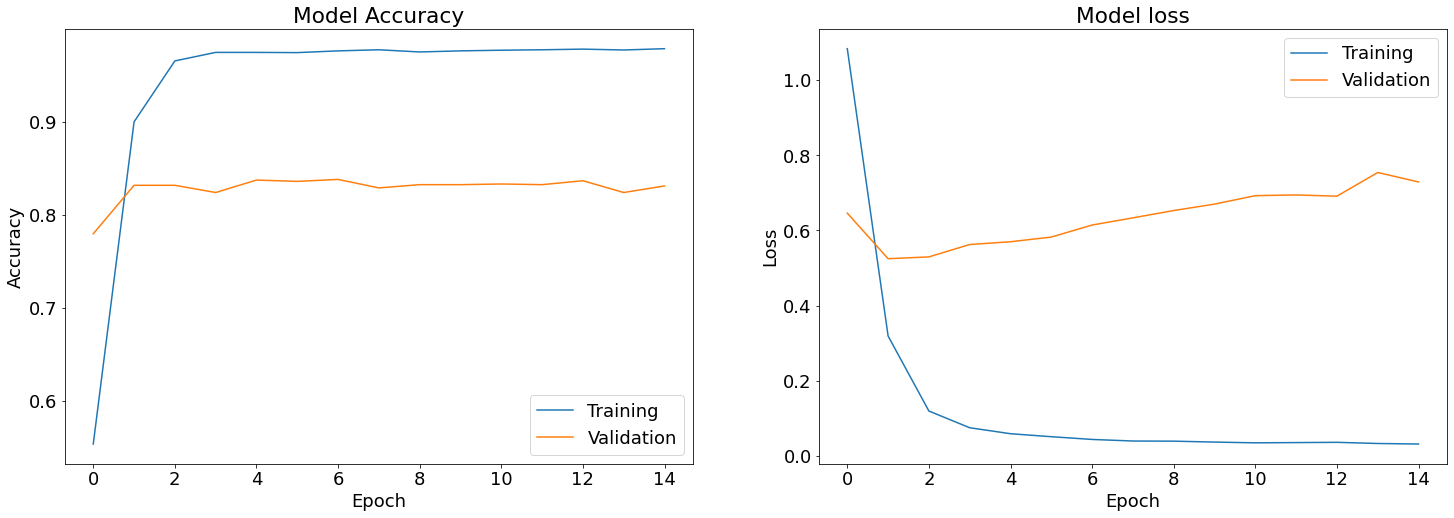

In [182]:
fig, ax = plt.subplots(1, 2, figsize = (20, 8))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

plt.rcParams.update({'font.size': 18})

# Plot training & validation accuracy values
ax[0].plot(history.history['accuracy'], label = 'Training')
ax[0].plot(history.history['val_accuracy'], label = 'Validation')
ax[0].set_title('Model Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend()

# Plot training & validation loss values
ax[1].plot(history.history['loss'], label = 'Training')
ax[1].plot(history.history['val_loss'], label = 'Validation')
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend()

plt.savefig('image34.png', facecolor='w', bbox_inches="tight",
        pad_inches=0.3, transparent=True)
plt.show()